In [5]:
projects_df_filter = projects_df[(projects_df['date_posted'] > '2011-01-01') & (projects_df['date_posted'] < '2013-01-01')]

In [7]:
dummy_vars_list = ['fully_funded', 'eligible_almost_home_match',]

categorical_vars_list = []

geographic_vars_list = ['school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county']

ids_var_list = ['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', ]


proj_out_df = inter_df[['projectid','fully_funded', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted']]

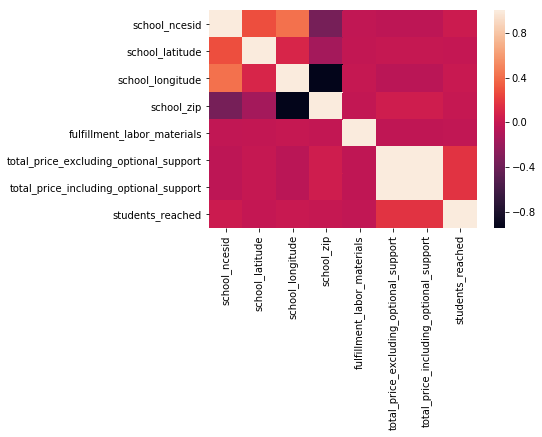

In [11]:
mlf.visualize_correlation_heatmap(proj_out_df)

In [21]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from scipy import optimize
import time
import seaborn as sns
import ML_functions as mlf
from sklearn.metrics import recall_score

In [23]:
full_projects_df = mlf.read_data('/Users/saptarshighose/Downloads/projects.csv', file_type = 'csv')
full_outcomes_df = mlf.read_data('/Users/saptarshighose/Downloads/outcomes.csv', file_type = 'csv')

projects_df = projects_df[(projects_df['date_posted'] > '2011-01-01') & (projects_df['date_posted'] < '2013-01-01')]
proj_out_df = pd.merge(projects_df, full_outcomes_df, on='projectid')


In [24]:
mlf.find_missing_values(proj_out_df)

secondary_focus_subject                           74094
secondary_focus_area                              74094
great_messages_proportion                         34589
non_teacher_referred_count                        29897
donation_from_thoughtful_donor                    29897
one_non_teacher_referred_donor_giving_100_plus    29897
three_or_more_non_teacher_referred_donors         29897
at_least_1_green_donation                         29897
at_least_1_teacher_referred_donor                 29897
teacher_referred_count                            29897
school_metro                                      25708
school_ncesid                                     14666
school_district                                     275
students_reached                                     14
resource_type                                        11
primary_focus_subject                                10
primary_focus_area                                   10
grade_level                                     

In [25]:
proj_out_df.set_index('projectid')

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,...,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
projectid,,,,,,,,,,,,,,,,,,,,,
92c21e73832af8a7e47e34a43d11e552,bcad628df5d4610dae949be4a60f0fe1,3d600eca19b8acb867377e3e71d607d9,5.509600e+11,43.090595,-87.975235,Milwaukee,WI,53216.0,urban,Milwaukee Public Schools,...,f,t,t,t,t,t,f,66.0,0.0,4.0
09b2a56c3600f49132f9c33ffa8dfc05,b8653a3287af4d0fe61b98334b82dde9,163466c1af772f2eaccff78aa889b1b8,NaN,40.017780,-82.972839,Columbus,OH,43211.0,urban,Ohio Department of Education,...,f,t,f,f,t,t,f,50.0,0.0,5.0
da8599db426f2ff702be71afc1eba40f,4f5cb884ba445d3719ce01580b1d5962,8c8b35c7b546140e95ce05f84db5fedb,NaN,39.686199,-75.585358,New Castle,DE,19720.0,suburban,Delaware Dept of Education,...,f,f,f,f,f,f,f,0.0,0.0,1.0
c32168bf7823b32a61b04cee75528607,ea5c83789a10a9755c4653df30d9c767,47b70ba40903972347e08db00a668f4f,1.709930e+11,42.003059,-87.705971,Chicago,IL,60645.0,urban,Ravenswood-ridge Elem Network,...,t,t,t,f,t,f,f,40.0,8.0,5.0
40cf116006e7d79ab5ae56dc28bd0775,c2b9a5e2c7ab3ce05b3ebde3cb0becb8,779428657b640e6735ec42626dcd6fec,5.307710e+11,47.523479,-122.324364,Seattle,WA,98108.0,urban,Seattle School District 1,...,f,t,t,f,f,t,f,NaN,0.0,1.0
be5b420814fdc91b6a67717e36c2a2a7,96a7ef4ed891454f5a68e07c6d46349a,7d7312285c855e2239baeca5b4b25fea,3.600078e+11,40.771709,-73.987174,New York,NY,10023.0,urban,New York City Dept Of Ed,...,t,t,t,f,t,f,f,44.0,2.0,8.0
1e7e91a2ceb7229d779f6c7139c907be,2d0bdc51c52d2a05cee17ddccf60bf91,056fd3003c83bb3c1d3371542808c5d4,3.412690e+11,40.911476,-74.160558,Paterson,NJ,7501.0,suburban,Paterson Public School Dist,...,f,t,f,f,t,t,f,33.0,0.0,5.0
c1783ccb329c70616446c71af1c08552,36663a723eb8f2f47d7b8ddbc1c67a80,a1efbfdbb4fff73cea2964685bc283a1,3.200060e+11,36.226992,-115.147216,N Las Vegas,NV,89032.0,suburban,Clark Co School District,...,f,t,f,f,f,t,f,0.0,0.0,2.0
136b937cc6486e351501d0901b256e98,da41c3eeb299abc1c8b58b3c35da17a9,02eeb2a3088d676e01039f04dd723532,6.227100e+10,33.961700,-118.222113,South Gate,CA,90280.0,suburban,Los Angeles Unif Sch Dist,...,f,f,t,t,f,f,f,66.0,0.0,2.0


In [26]:
mlf.impute_missing_values(proj_out_df, 'students_reached', fill_method = 'mean')

In [27]:
NOTEBOOK = 0

def define_clfs_params(grid_size):
    """Define defaults for different classifiers.
    Define three types of grids:
    Test: for testing your code
    Small: small grid
    Large: Larger grid that has a lot more parameter sweeps
    """

    clfs = {'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
        'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
        'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'NB': GaussianNB(),
        'DT': DecisionTreeClassifier(),
        'SGD': SGDClassifier(loss="hinge", penalty="l2"),
        'KNN': KNeighborsClassifier(n_neighbors=3) 
            }

    large_grid = { 
    'RF':{'n_estimators': [1,10,100,1000,10000], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10], 'n_jobs': [-1]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.0001,0.001,0.01,0.1,1,10]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [1,10,100,1000,10000], 'criterion' : ['gini', 'entropy'] ,'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10], 'n_jobs': [-1]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
    'GB': {'n_estimators': [1,10,100,1000,10000], 'learning_rate' : [0.001,0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [1,3,5,10,20,50,100]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100],'min_samples_split': [2,5,10]},
    'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    small_grid = { 
    'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.001,0.1,1,10]},
    'SGD': { 'loss': ['hinge','log','perceptron'], 'penalty': ['l2','l1','elasticnet']},
    'ET': { 'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.001,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,50]},
    'NB' : {},
    'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100],'min_samples_split': [2,5,10]},
    'SVM' :{'C' :[0.00001,0.0001,0.001,0.01,0.1,1,10],'kernel':['linear']},
    'KNN' :{'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }
    
    test_grid = { 
    'RF':{'n_estimators': [1], 'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'LR': { 'penalty': ['l1'], 'C': [0.01]},
    'SGD': { 'loss': ['perceptron'], 'penalty': ['l2']},
    'ET': { 'n_estimators': [1], 'criterion' : ['gini'] ,'max_depth': [1], 'max_features': ['sqrt'],'min_samples_split': [10]},
    'AB': { 'algorithm': ['SAMME'], 'n_estimators': [1]},
    'GB': {'n_estimators': [1], 'learning_rate' : [0.1],'subsample' : [0.5], 'max_depth': [1]},
    'NB' : {},
    'DT': {'criterion': ['gini'], 'max_depth': [1],'min_samples_split': [10]},
    'SVM' :{'C' :[0.01],'kernel':['linear']},
    'KNN' :{'n_neighbors': [5],'weights': ['uniform'],'algorithm': ['auto']}
           }
    
    if (grid_size == 'large'):
        return clfs, large_grid
    elif (grid_size == 'small'):
        return clfs, small_grid
    elif (grid_size == 'test'):
        return clfs, test_grid
    else:
        return 0, 0

# a set of helper function to do machine learning evalaution

def joint_sort_descending(l1, l2):
    # l1 and l2 have to be numpy arrays
    idx = np.argsort(l1)[::-1]
    return l1[idx], l2[idx]

def generate_binary_at_k(y_scores, k):
    cutoff_index = int(len(y_scores) * (k / 100.0))
    test_predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return test_predictions_binary

def precision_at_k(y_true, y_scores, k):
    y_scores, y_true = joint_sort_descending(np.array(y_scores), np.array(y_true))
    preds_at_k = generate_binary_at_k(y_scores, k)
    #precision, _, _, _ = metrics.precision_recall_fscore_support(y_true, preds_at_k)
    #precision = precision[1]  # only interested in precision for label 1
    precision = precision_score(y_true, preds_at_k)
    return precision

def recall_at_k(y_true, y_scores, k):
    #y_scores_sorted, y_true_sorted = zip(*sorted(zip(y_scores, y_true), reverse=True))
    y_scores_sorted, y_true_sorted = joint_sort_descending(np.array(y_scores), np.array(y_true))
    preds_at_k = generate_binary_at_k(y_scores_sorted, k)
    #precision, _, _, _ = metrics.precision_recall_fscore_support(y_true, preds_at_k)
    #precision = precision[1]  # only interested in precision for label 1
    recall = recall_score(y_true_sorted, preds_at_k)
    return recall

def plot_precision_recall_n(y_true, y_prob, model_name):
    from sklearn.metrics import precision_recall_curve
    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax1.set_ylim([0,1])
    ax1.set_ylim([0,1])
    ax2.set_xlim([0,1])
    
    name = model_name
    plt.title(name)
    #plt.savefig(name)
    plt.show()
    


def clf_loop(models_to_run, clfs, grid, X_train, X_test, y_train, y_test):
    """Runs the loop using models_to_run, clfs, gridm and the data
    """
    results_df =  pd.DataFrame(columns=('model_type','clf', 'parameters', 'auc-roc','p_at_1','p_at_2','p_at_5', 'p_at_10', 'p_at_20','p_at_30','p_at_50','recall_at_1','recall_at_2','recall_at_5','recall_at_10','recall_at_20','recall_at_30','recall_at_50'))
    
    for n in range(1, 2):
        # create training and valdation sets
        for index,clf in enumerate([clfs[x] for x in models_to_run]):
            print(models_to_run[index])
            parameter_values = grid[models_to_run[index]]
            for p in ParameterGrid(parameter_values):
                try:
                    clf.set_params(**p)
                    y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    # you can also store the model, feature importances, and prediction scores
                    # we're only storing the metrics for now
                    y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
                    results_df.loc[len(results_df)] = [models_to_run[index],clf, p,
                                                       roc_auc_score(y_test, y_pred_probs),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,1.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,2.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,30.0),
                                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,50.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 1.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 2.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 5.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 10.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 20.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 30.0),
                                                       recall_at_k(y_test_sorted,y_pred_probs_sorted, 50.0)]
                    if NOTEBOOK == 1:
                        plot_precision_recall_n(y_test,y_pred_probs,clf)
                except IndexError as e:
                    print('Error:',e)
                    continue
    return results_df

In [28]:
def LR():
    return LogisticRegression(penalty = 'l1', C = 1e5)


def KNN():
    return KNeighborsClassifier(n_neighbors = 3)


def DT():
    return DecisionTreeClassifier()


def SVM():
    return svm.SVC(kernel = 'linear', probability = True, random_state = 3)


def RF():
    return RandomForestClassifier(n_estimators = 50, n_jobs = -1)


def AB():
    return AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                                    algorithm="SAMME",
                                                    n_estimators=200)

def GB():
    return GradientBoostingClassifier(learning_rate = 0.05,
                                    	subsample = 0.5,
                                    	max_depth = 6,
                                    	n_estimators = 10)

def NB():
    return GaussianNB()

In [30]:
classify = proj_out_df[['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted','fully_funded']]
# projects + fully funded 

y = proj_out_df[['date_posted', 'fully_funded']]

In [31]:
def find_binary_cols(df):
    binary = []
    for c in df.columns:
        if len(df[c].unique()) <= 2:
            binary.append(c)
    return binary

In [32]:
b = find_binary_cols(classify)


In [33]:
def turn_to_1_0(df, b):
    for col in b:
        df[col] = df[col].apply(lambda x: 1 if x=='t' else 0)

In [34]:
mlf.convert_true_false_1_0(classify)

/Users/saptarshighose/Downloads/Machine-Learning/HW3/ML_functions.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x=='t' else 0)


In [35]:
cats = [x for x in classify.columns if x not in b]   
cats = ['school_metro', 'teacher_prefix', 'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level']

In [36]:
def category_cols(df, cats):
    for c in cats:
        temp = pd.get_dummies(classify[c])
        print("temp", temp.columns)
        df = df.join(temp)
        print("intermediate", df.columns)
        df = df.drop(c, axis=1)
        print("final", df.columns)
    return df
        
classify = category_cols(classify, cats)

temp Index(['rural', 'suburban', 'urban'], dtype='object')
intermediate Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'fully_funded', 'rural', 'suburban', 'urban'],
      dtype='object')
final Index([

final Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'secondary_focus_subject', 'secondary_focus_area', 'grade_level',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'fully_funded', 'rural', 'suburban', 'urban', 'Dr.',
       'Mr.', 'Mrs.', 'Ms.', 'Applied Learning', 'Health & Sports',
       'History & Civics', 'Literacy & Language', 'Math & Science',
       'Music & The Arts', 'Special Needs', 'Books', 'Other', '

In [37]:
features = [ 'school_charter',
       'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
        'fully_funded', 'rural', 'suburban', 'urban', 'Dr.',
       'Mr.', 'Mrs.', 'Ms.', 'Applied Learning', 'Health & Sports',
       'History & Civics', 'Literacy & Language', 'Math & Science',
       'Music & The Arts', 'Special Needs', 'Books', 'Other', 'Supplies',
       'Technology', 'Trips', 'Visitors', 'high poverty', 'highest poverty',
       'low poverty', 'moderate poverty', 'Grades 3-5', 'Grades 6-8',
       'Grades 9-12', 'Grades PreK-2']

In [38]:
x_test, x_train, y_test, y_train = train_test_over_time(classify, features)


In [39]:
def run_simple_loop(X_test, X_train, y_test, y_train):

    # define grid to use: test, small, large
    grid_size = 'test'
    clfs, grid = define_clfs_params(grid_size)
    
    # define models to run
    models_to_run=['RF','DT','KNN', 'ET', 'AB', 'GB', 'LR', 'NB']

    # call clf_loop and store results in results_df
    results_df = clf_loop(models_to_run, clfs,grid, X_test, X_train, y_test, y_train)

    return results_df

In [40]:
run_simple_loop(x_test, x_train, y_test, y_train)

/Users/saptarshighose/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


RF
DT
KNN
ET
AB
GB
LR
NB


,model_type,clf,parameters,auc-roc,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50,recall_at_1,recall_at_2,recall_at_5,recall_at_10,recall_at_20,recall_at_30,recall_at_50
0,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.499213,0.791579,0.895899,0.958368,0.979189,0.989595,0.993064,0.995838,0.011448,0.025940,0.069387,0.141818,0.286680,0.431542,0.721236
1,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014462,0.028954,0.072401,0.144832,0.289694,0.434556,0.724250
2,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.732188,1.000000,1.000000,1.000000,0.755308,0.877667,0.918447,0.904910,0.014462,0.028954,0.072401,0.109393,0.254255,0.399117,0.655381
3,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.509355,1.000000,0.583596,0.830530,0.915283,0.957646,0.971765,0.983059,0.014462,0.016898,0.060131,0.132562,0.277424,0.422286,0.711981
4,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 1}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014462,0.028954,0.072401,0.144832,0.289694,0.434556,0.724250
5,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014462,0.028954,0.072401,0.144832,0.289694,0.434556,0.724250
6,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014462,0.028954,0.072401,0.144832,0.289694,0.434556,0.724250
7,NB,GaussianNB(priors=None),{},0.999954,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014462,0.028954,0.072401,0.144832,0.289694,0.434556,0.724250
